In [24]:
########  TESTING BLOCK  ########
GLOBAL_TEST_FILE ="../parse_data/data/splited/1210.csv"
########  TESTING BLOCK  ########

In [69]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
把csv或excel檔案轉換成dataframe
以供後續的pandas操作
"""

import pandas as pd
import numpy as np
from datetime import datetime

def readStock_file(file, filetype='csv'):


    if filetype == 'excel':
        df = pd.read_excel(file, engine='openpyxl', parse_dates=True, header=None)
    else:
        df = pd.read_csv(file)

    # 取代原本的 column 名稱
    # 檔案的日期與開高低收需要照這個順序
    colume_name = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    df.columns = colume_name

    # 用日期這一行當做 df 的索引
    df = df.set_index('Date')

    # 把日期轉成 datetime的格式(從string)
    df.index = pd.to_datetime(df.index)

    # 照日期排序並把空資料轉成numpy的nan
    df = df.sort_index()
    df = df.replace(r'^\s*-$', np.nan, regex=True)


    for col in df.columns:
        if(col=='Date'):
            continue;
        df[col] = np.array([float(x) for x in df[col]])

    return df

def random_sample(ticker_list_file = "../parse_data/data/ticker_name.csv",  column = '證券代碼', times = 10):
    

    ticker_list_df = pd.read_csv(ticker_list_file, encoding='utf8', usecols=[column])
    ticker_list = ticker_list_df[column].to_list()
    
    sample = np.random.choice(ticker_list, times)
    sample_list = [i.replace(' ', '') for i in sample.tolist()]

    return sample_list

def file_list_with_directory(file_list, path):
    
    files = [path+i+'.csv' for i in file_list]
    return files

########  TESTING BLOCK  ########
lst = random_sample()
for i in file_list_with_directory(lst, '../parse_data/data/splited/'):
    print(i)
########  TESTING BLOCK  ########

../parse_data/data/splited/2373.csv
../parse_data/data/splited/1507.csv
../parse_data/data/splited/6189.csv
../parse_data/data/splited/32023.csv
../parse_data/data/splited/8067.csv
../parse_data/data/splited/32881.csv
../parse_data/data/splited/8466.csv
../parse_data/data/splited/3167.csv
../parse_data/data/splited/3067.csv
../parse_data/data/splited/2885.csv


c:\python39\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


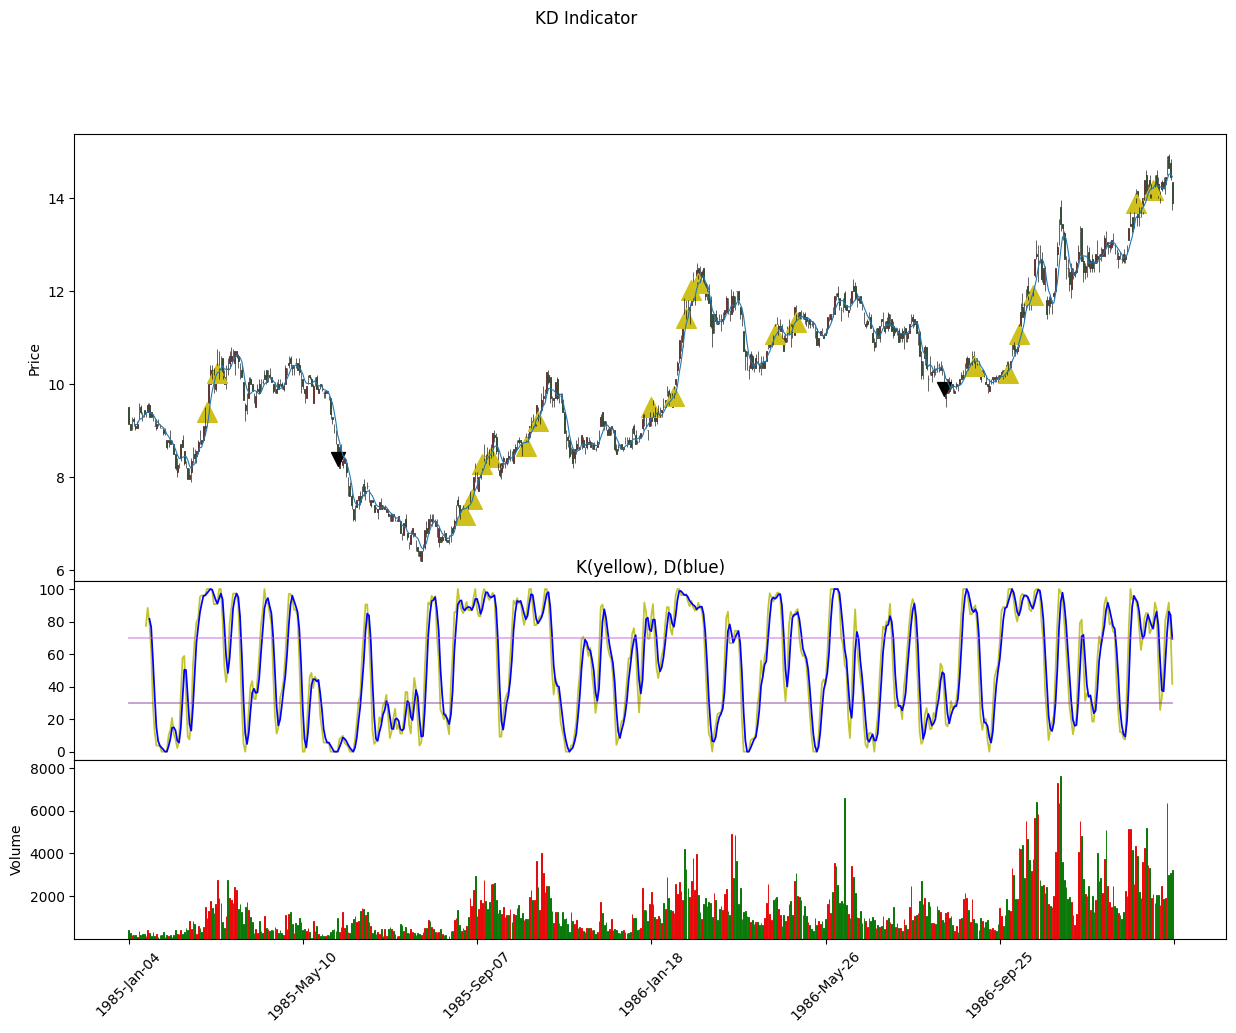

	1985/03/05 buy  9.6
	1985/03/12 buy  10.4
	1985/06/03 sell 8.3
	1985/08/30 buy  7.3
	1985/09/04 buy  7.6
	1985/09/11 buy  8.4
	1985/09/17 buy  8.6
	1985/10/14 buy  8.8
	1985/10/22 buy  9.4
	1986/01/18 buy  9.6
	1986/02/04 buy  9.9
	1986/02/19 buy  11.6
	1986/02/22 buy  12.2
	1986/02/27 buy  12.4
	1986/04/22 buy  11.2
	1986/05/06 buy  11.5
	1986/08/16 sell 9.8
	1986/09/05 buy  10.6
	1986/10/02 buy  10.4
	1986/10/09 buy  11.2
	1986/10/21 buy  12.1
	1987/01/12 buy  14.1
	1987/01/23 buy  14.4
	1987/02/13 sell 13.9
	trading times :  3
	return rate : -4.822%


In [118]:
class trade:

    
    """
    用於回測並模擬股票交易的模塊
    會在模擬交易時記錄價格並計算出投報率等數據
    
    建構式參數：
        ticker 是放了股價資料的 pandas dataframe
        comission 是手續費
        tax 是交易稅
        holding_limit 是持有股票上限
        print_trading 是否在result()時 印出交易資料
        print_returnRate 是否在result()時 印出投資報酬率
        print_tradingTimes 是否在result()時 印出交易次數

    成員變數：
        principal 股票購入金額
        balance 餘額
        holding_tickers 持有股票數量
        returns 投資報酬率
        trading_nums 交易次數
    """
    __comission = 0
    def __init__(self, ticker ,comission=0, tax=0, holding_limit=0,
                    print_trading=False, print_returnRate=False, print_tradingTimes=False):


        self.comission = comission
        self.tax = tax
        self.ticker = ticker
        self.holding_limit = holding_limit

        self.print_trading = print_trading
        self.print_returnRate = print_returnRate
        self.print_tradingTimes = print_tradingTimes

        self.principal = 0
        self.balance = 0
        self.holding_tickers = 0
        self.returns = 0
        self.trading_nums = 0

    """
    模擬買入股票
    這裡會印出買入的日期與價格

    操作流程：
        購入金額設為 含手續費的當日收盤價
        餘額減去 含手續費的當日收盤價
        股票持有數量加一
    """
    def buy(self):
        if((self.holding_limit == 0) or
            self.holding_tickers < self.holding_limit):

            if self.print_trading:
                date = datetime.strftime(self.date,'%Y/%m/%d')
                close_price = round(self.position['Close'],1)
                print('\t{} buy  {}'.format(date,close_price))

            
            self.principal += self.position['Close'] * (1 + self.comission)

            self.balance -= self.position['Close'] * (1 + self.comission)
            self.holding_tickers = self.holding_tickers + 1

        return None

    """
    模擬賣出股票
    這裡會印出賣出的日期與價格

    操作流程：
        購入金額設為 含手續費的當日收盤價
        餘額加回 含手續費與交易稅的當日收盤價
        股票持有數量減一
        交易次數加一(買入+賣出算一次)

        投報率算法：餘額 / 購入金額
        累計投報率：把所有投報率"加起來"
    """
    def sell(self):
        if(self.holding_tickers):
            if self.print_trading:
                date = datetime.strftime(self.date,'%Y/%m/%d')
                close_price = round(self.position['Close'] ,1)
                print('\t{} sell {}'.format(date,close_price))

            self.balance += self.position['Close'] * (1 - self.comission - self.tax) * self.holding_tickers

            self.returns += (self.balance/self.principal)
#             print(self.returns)
            self.principal, self.balance= 0,0
            self.holding_tickers = 0

            self.trading_nums = self.trading_nums+1
        return None

    """
    run()的時候，會在每一個日期逐一執行next
    實際在使用的時候需要複寫這個函式(用繼承的方式)
    否則會使用預設的next()

    預設：
        不論條件，每天買兩次賣一次
    """
    def next(self):

        self.buy()
        self.buy()
        self.sell()
        return None

    """
    在每一個日期逐一執行 next()
    而next()內會判斷是否需要在當天進行買入或賣出
    """
    def run(self):
        for index, row in self.ticker.iterrows():
            self.position = row
            self.date = index

            self.next()

        for _i in range(self.holding_tickers):
            self.sell()

    """
    返回投資報酬率
    並依照條件印出相關交易資料
    """
    def result(self):


        return_rate = round(self.returns *100, 4)

        if self.print_tradingTimes:
            print("\ttrading times : ", self.trading_nums)

        if self.print_returnRate:
            print("\treturn rate : {r}%".format(r=return_rate))

        return return_rate
    
########  TESTING BLOCK  ########
class derieved(trade):

    def next(self):
        if(self.position['buy'] == 1):
            self.buy()
        if(self.position['sell'] == 1):
            self.sell()

# 自己寫的 tools.readStock_file
ticker = readStock_file(GLOBAL_TEST_FILE)
ticker = ticker.head(600)

dw = pure_KD(ticker, plot=True,short_stop_loss=True)

# 手續費是0.1425%
# 股票交易稅是0.3%
# 持有上限是1
bakctesting = derieved(dw, 0.001425, 0.003, 0,
                print_trading=True,
                print_tradingTimes=True,
                print_returnRate=True)


bakctesting.run()

# result()會傳回投資報酬率
# 同時也會 print出交易記錄等資訊
result = bakctesting.result()
########  TESTING BLOCK  ########

In [29]:
"""
計算指標與信號常用的小工具
例如是否交叉，是否到達停損點等等
"""
import numpy as np

# 移動停損
# stop_loss 低於股價最高點多少比例就賣出
def moving_stop_loss(dw, stop_loss = 0.2):

    holding = 0 # 是否有持股
    high = 0 # 股票最高點

    # 如果沒有賣出信號這個欄位便新增
    if not 'sell' in dw:
        dw['sell'] = np.zeros(dw.shape[0])


    for index, row in dw.iterrows():
        if row['buy'] == 1:
            holding = 1


        # 持股時會持續記錄最高收盤價
        # 並判斷是否要賣出
        if holding:
            # 低於最高收盤價一定比例
            # 就產生賣出信號
            if row['Close'] < high*(1-stop_loss) :
                row['sell'] = 1

                holding = 0
                high = 0

            high = max(row['Close'], high)

    return dw

# 線a 是否在第 i 天向上穿出線b
def crossover(dw, i , a, b):
    if (((dw.iloc[i][a] > dw.iloc[i][b]) and
        (dw.iloc[i-1][a] < dw.iloc[i-1][b])) and
        (dw.iloc[i][a] > dw.iloc[i-1][a])):

        return 1;
def crossover_downward(dw, i, a, b):
    if (((dw.iloc[i][a] < dw.iloc[i][b]) and
        (dw.iloc[i-1][a] > dw.iloc[i-1][b])) and
        (dw.iloc[i][a] < dw.iloc[i-1][a])):

        return 1;

In [30]:
"""
這裡的函式可以用來計算指標
以價格動能相關的指標為主

dataframe裡，必須含有"Close"這個column
"""
import pandas as pd


def KD(ticker,RSVn = 9,RSVt = 3,Kt = 3,):
    tmp = pd.DataFrame(index=ticker.index)
    tmp['max_close'] = ticker['Close'].rolling(RSVn).max()
    tmp['min_close'] = ticker['Close'].rolling(RSVn).min()
    tmp['RSV'] = (ticker['Close'] - tmp['min_close'])/(tmp['max_close']-tmp['min_close'])*100

    tmp['k'] = tmp['RSV'].rolling(RSVt).mean()
    tmp['d'] = tmp['k'].rolling(Kt).mean()

    return tmp['k'], tmp['d']

def MA(ticker, interval = 20):
    return  ticker['Close'].rolling(interval).mean()

In [31]:
import mplfinance as mpf

MPF_COLORSET = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')
MPF_STYLESET = mpf.make_mpf_style(marketcolors = MPF_COLORSET)
MPF_KWARGS = dict(type = 'candle', mav = 5, figscale = 2,\
              volume = True, volume_panel=2,
              style = MPF_STYLESET, scale_width_adjustment = dict(volume = 0.5))

def signal_points_generator(dw):
    buy, sell = [], []
    for index, row in dw.iterrows():
        buy.append(row['Close']*0.985 if row['buy'] else np.nan)
        sell.append(row['Close']*1.01 if row['sell'] else np.nan)
    return buy, sell

def all_nan(arr):
    if np.count_nonzero(np.isnan(arr)) == len(arr):
        return True
    return False

def plots_add_sell_buy(plots, points):
    buy_points, sell_points = points[0], points[1]
    # 如果有賣出的記錄就放進第一個 panel(main paenl)
    if not all_nan(sell_points):
        plots.append(mpf.make_addplot(sell_points , type = 'scatter', color = 'black', marker = 'v', markersize = 100))
    # 如果有買入的記錄就放進第一個 panel(main paenl)
    if not all_nan(buy_points):
        plots.append(mpf.make_addplot(buy_points , type = 'scatter', color = '#cfc01d', marker = '^', markersize = 200))
    

c:\python39\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


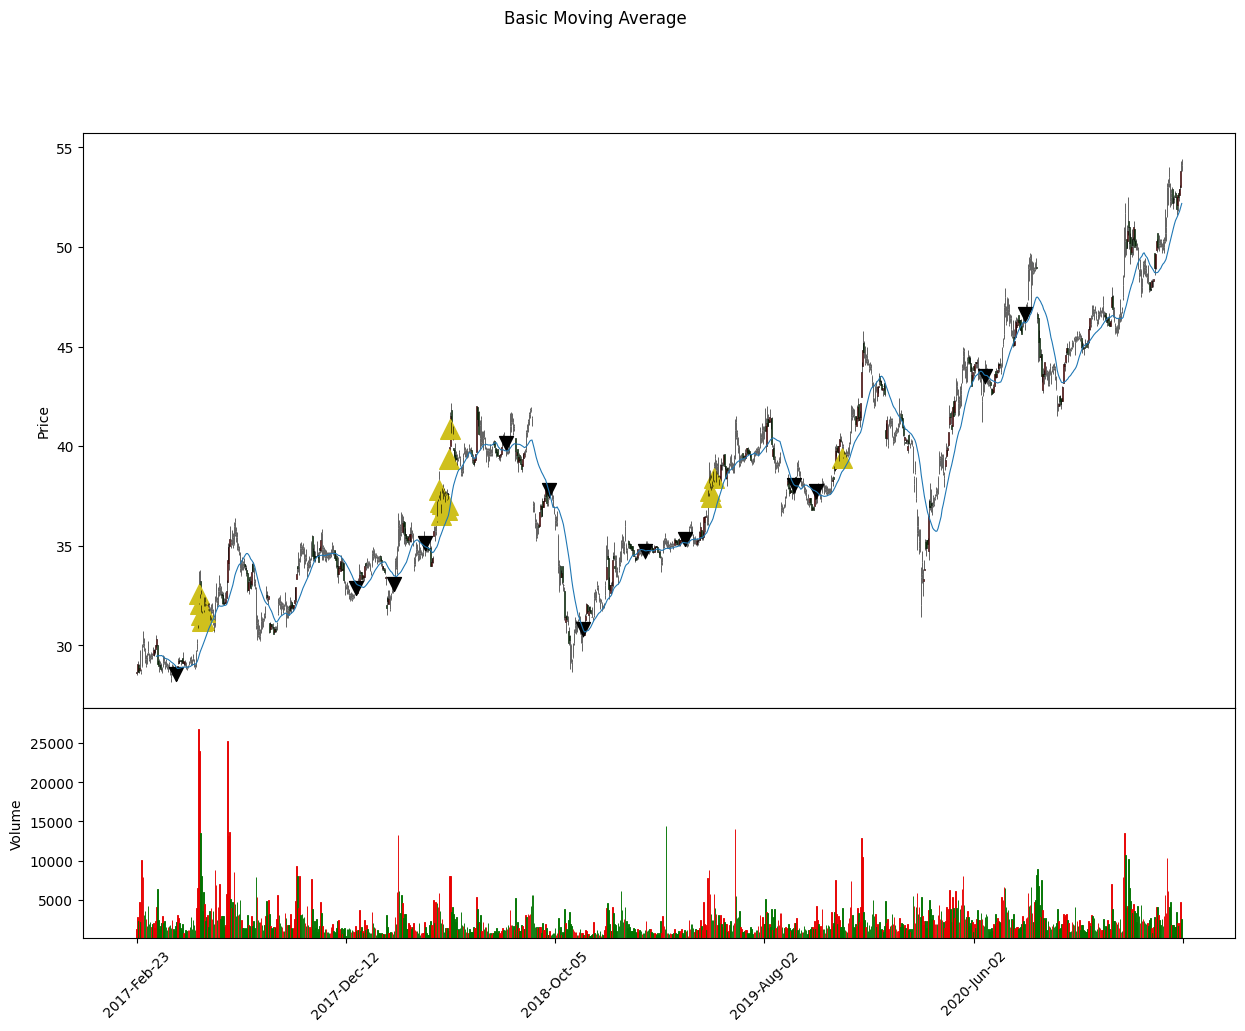

In [186]:
"""
放各種不同的股票策略
用上面的指標與是否停損等條件
判斷是否要買進賣出
"""
import pandas as pd
# import talib
import numpy as np
import mplfinance as mpf

stop_loss = 0.2
"""
只使用KD指標作為買入賣出的判斷
高點線以上黃金交叉就買入
地點線以下死亡交叉就賣出
參數：
    ticker 股價 dataframe
    RSVn RSV計算最高股價與最低股價取幾天為區間
    RSVt 計算K時，平滑RSV(移動平均) 取幾天為區間
    Kt 計算D時，平滑K(移動平均) 取幾天為區間
    upperBound KD高於這個點就買入
    lowerBound KD低於這個點就賣出
    short_stop_loss 移動停損率
"""
def pure_KD(ticker, RSVn = 9,
                        RSVt = 3,
                        Kt = 3,
                        upperBound = 70,
                        lowerBound = 30,
                        short_stop_loss=True,
                        plot=False):

    dw = ticker
    dw['slowk'], dw['slowd'] = KD(ticker, RSVn, RSVt, Kt)

    dw['signal'] = 0.0
    dw['signal'][RSVn:]  = np.where((dw['slowk'][RSVn:]
                                                > dw['slowd'][RSVn:]), 1.0, 0.0)

    # positon 是 1 便是 k 向上穿出 d
    #           -1則是 k 向下穿出 d
    # 這裡的黃金與死亡交叉定義比較寬鬆
    # 不限定 k或d 一定要往上或往下
    dw['positon'] = dw['signal'].diff()

    # k 向上穿出並大於高點線就買入
    dw['buy'] = np.where((dw['slowk'] > upperBound) & (dw['positon'] == 1 ), 1.0, 0.0)

    # 是否進行移動停損
    if short_stop_loss:
        dw = moving_stop_loss(dw, 0.2)
    else :

        # k 向下穿出並小於低點線就賣出
        dw['sell'] = np.where((dw['slowk'] < lowerBound) & (dw['positon'] == -1 ), 1.0, 0.0)

    
#     for index, row in dw.iterrows():
#         if(row['sell'] == 1):
#             print(row['Close'],row['slowk'],row['slowd'])
    if(plot):
        # 把 KD指標的圖放到第二個 panel 內
        plots = [
            # '#c2c42d' 是金色
            mpf.make_addplot(dw['slowk'], panel = 1, color='#c2c42d', title='K(yellow), D(blue)'),
            mpf.make_addplot(dw['slowd'], panel = 1, color='blue'),

            # upperbound 的線
            mpf.make_addplot(np.full((len(dw['slowk'])), upperBound), panel = 1, color='#bf5ce0', alpha=0.5),
            mpf.make_addplot(np.full((len(dw['slowk'])), lowerBound), panel = 1, color='#7e3696', alpha=0.5),
        ]

        plots_add_sell_buy( plots, signal_points_generator(dw))
        #繪圖 (股票資料、印出成交量、設定風格(蠟燭圖))
        mpf.plot(dw, **MPF_KWARGS, addplot = plots, title = 'KD Indicator')


    
    return dw


def basic_MA(ticker,
             ma_window = 20,
             crossover_trade = False,
             plain_range = 0.00002,
             plain_tolerance = 15,
             plain_interval = 5,
             go_up_interval = 3,
             go_up_threshold = 0.01,
             angle_interval = 3,
             plot = False):
    
    dw = ticker
    dw['ma'] = MA(ticker, interval=ma_window)
    
    dw['buy'] = np.zeros(dw.shape[0])
    dw['sell'] = np.zeros(dw.shape[0])
    
    previous_plain = 0
    if dw.shape[0] > ma_window:
        for i in range(ma_window, dw.shape[0]-1):
            
            # 股價向上穿出MA20 && 紅K線
            if(crossover_trade and crossover(dw, i, 'Close', 'ma') and (dw['Close'][i] > dw['Open'][i])):
                dw['buy'][i] =  1
            
            # 計算 interval內 MA的幾何平均成長率
            plain = 1
            for i in range(i-plain_interval-go_up_interval+1, i-go_up_interval):
                if i < 1:
                    break
                diff = dw['ma'][i] / dw['ma'][i-1]
                plain *= diff
            
            # 如果 平均成長率在 plain_range內就判斷成平原
            if(abs((plain ** (1.0/ plain_interval))-1) < (plain_range)):
                previous_plain = i
                
                
            # 股價站上20日MA，MA由水平往上
            # 上次平原距離今日不超過 plain_tolerance 日的話，才判斷是否成長
            # 第i日 與 第i-go_up_interval日計算成長率，成長率超過go_up_threshold內就判斷為成長
            if i > go_up_interval:
                
                MA_go_up = (dw['ma'][i]) / dw['ma'][i-go_up_interval]
                
    
                if( (dw['ma'][i] < dw['Close'][i]) and (i-previous_plain <= plain_tolerance)and (abs(MA_go_up-1) > go_up_threshold)):
                    dw['buy'][i] = 1
                    
#                 print(i-previous_plain, MA_go_up)
                
            # 股價向下穿出MA20 && 黑K線
            if( crossover_downward(dw, i+1, 'ma', 'Close') and (dw['Close'][i] < dw['Open'][i])):
                dw['sell'][i] =  1
    
    
    if(plot):
        plots = []
        plots_add_sell_buy( plots, signal_points_generator(dw))
        #繪圖 (股票資料、印出成交量、設定風格(蠟燭圖))
        AVG_KWARGS = dict(type = 'candle', 
                          mav = ma_window , 
                          figscale = 2,
                          volume = True,
                          style = MPF_STYLESET, 
                          scale_width_adjustment = dict(volume = 0.75))
        mpf.plot(dw, **AVG_KWARGS, addplot = plots, title = 'Basic Moving Average')

    return dw
"""
使用三條均線進行判斷
產生金三角就買入
賣出則只使用移動停損
參數：
    ticker 股價 dataframe
    ma_window_short 第一條均線的區間
    ma_window_mid   第二條均線的區間
    ma_window_long  第三條均線的區間
    tolerence_interval  金三角的容許範圍
"""
def tripleMA_stopLoss(  ticker,
                ma_window_short = 7,
                ma_window_mid = 15,
                ma_window_long = 21,
                tolerence_interval = 7,
                plot = False):

    dw = ticker

    # 計算三條平均線
    dw['ma_short'] = MA(dw, ma_window_short)
    dw['ma_mid'] = MA(dw, ma_window_mid)
    dw['ma_long'] = MA(dw, ma_window_long)
    
    
    # 初始化 買入信號的欄位
    dw['buy'] = np.zeros(dw.shape[0])
    if dw.shape[0] > ma_window_long:

        # 上一次 短線向上穿出中線 距離現在幾天
        last_cross_mid = tolerence_interval
        # 上一次 短線向上穿出長線 距離現在幾天
        last_cross_long = tolerence_interval
        for i in range(ma_window_long, dw.shape[0]):

            if crossover(dw, i, 'ma_short', 'ma_mid'):
                last_cross_mid = 0
            if crossover(dw, i, 'ma_short', 'ma_long'):
                last_cross_long = 0

            # 容許範圍內，短線是否向上穿出中線，短線是否向上穿出長線
            # 如果都有，且中線也向上穿出長線
            # 就判斷為金三角
            if (crossover(dw, i, 'ma_mid', 'ma_long') and
                last_cross_mid < tolerence_interval and
                last_cross_long < tolerence_interval) :

                # 金三角買入
                dw['buy'][i] =  1

                # 重置上一次短線穿出 距離現在幾天
                last_cross_mid = tolerence_interval
                last_cross_long = tolerence_interval

            last_cross_mid = last_cross_mid+1
            last_cross_long = last_cross_long+1

    # 賣出信號 僅使用移動停損
    dw = moving_stop_loss(dw, 0.2)
    
    if plot:
        plots = []
        plots_add_sell_buy( plots, signal_points_generator(dw))
        #繪圖 (股票資料、印出成交量、設定風格(蠟燭圖))
        AVG_KWARGS = dict(type = 'candle', 
                          mav = (ma_window_short,ma_window_mid,ma_window_long) , 
                          figscale = 2,
                          volume = True,
                          style = MPF_STYLESET, 
                          scale_width_adjustment = dict(volume = 0.75))
        mpf.plot(dw, **AVG_KWARGS, addplot = plots, title = 'Moving Average Golden Triangle')
    return dw

"""
使用威廉指標進行判斷
會先判斷股價是否是近期最高點
如果是的話，低於低點線會買入
如果不是的話，高於高點線賣出
參數：
    ticker 股價 dataframe
    n 威廉指標的計算區間
    tolerence_interval 近期最高點的判斷天數
    lowerBound 低點線
    upperBound 高點線
    short_stop_loss 移動停損率
"""
def WMR(ticker, n = 14, tolerence_interval = 4, upperBound = 80, lowerBound = 20, short_stop_loss = True):
    dw = ticker

    # n 天內最高收盤價
    dw['current_high'] = dw['Close'].rolling(n).max()
    # n 天內最低收盤價
    dw['current_low'] = dw['Close'].rolling(n).min()

    # 威廉指標
    dw['W%R'] = (dw['current_high'] - dw['Close'])/(dw['current_high']-dw['current_low'])*100

    # tolerence_interval 期間內最高收盤價
    dw['HIGH_current_high'] =  dw['High'].rolling(tolerence_interval).max()

    # 是近期最高，且低於地點線，買入
    dw['buy'] = np.where((dw['W%R'] < lowerBound) & (dw['High'] == dw['HIGH_current_high'] ), 1.0, 0.0)

    # 是否進行移動停損
    if short_stop_loss:
        dw = moving_stop_loss(dw, 0.2)
    else :

        # 不是近期最高，且高於高點線，賣出
        dw['sell'] = np.where((dw['W%R'] > upperBound) & (dw['High'] != dw['HIGH_current_high']  ), 1.0, 0.0)


    return dw


########  TESTING BLOCK  ########
ticker = readStock_file(GLOBAL_TEST_FILE)
ticker = ticker.tail(1000)
# signals = tripleMA_stopLoss(ticker,30,60,120,30)
signals = basic_MA(ticker,20, plot=True)
########  TESTING BLOCK  ########

In [115]:
"""
main()的部分
把上面的所有東西統合起來
用模擬交易去跑上述的策略
"""
import pandas as pd
import numpy as np
import glob
from functools import partial

########  Basic Settings  ########
print_format = {'tradingRecord'     : False, # 交易記錄
                'tradingNum'        : True,# 交易次數
                'fileName'          : True, # 逐一顯示檔案名稱
                'fileNameNewLine'   : True, # 每一個檔案跑完是否加換行
                'returnRate'        : True, # 投資報酬率
                }

# 用正則表示式表示有哪些檔案
file_pattern = "../parse_data/data/splited/1210.csv"
data_directory = '../parse_data/data/splited/'
random_choice_num = 10
limit_time_interval = 600

# 選取下列策略中的哪一個
choose_strategy = 'basic_MA'
########  Basic Settings  ########

########  Strategiy Configuration  ########

# 用functools.partial()把function的參數儲存起來
# 之後呼叫就不需要再傳入重複的參數
strategies = {
    'WMR' : partial(
        WMR,
        short_stop_loss=True,),      # 移動停損

    'Complete_KD' : partial(
        pure_KD,
        short_stop_loss=True,),       # 移動停損

    'tripleMA_stopLoss' : partial(
        tripleMA_stopLoss,
        ma_window_short = 7,        # 第一條均線的區間
        ma_window_mid = 15,         # 第二條均線的區間
        ma_window_long = 21,        # 第三條均線的區間
        tolerence_interval = 7),    # 金三角的容許範圍
    
    'basic_MA' : partial(
        basic_MA,
        ma_window = 20,
        plot=False),
}
########  Strategiy Configuration  ########

# 在新的 class中表示出什麼時候買
# 例如 當self.position的買入信號是1的時候買
class derieved(trade):

    def next(self):
        if(self.position['buy'] == 1):
            self.buy()
        if(self.position['sell'] == 1):
            self.sell()


returnRates = {}
# for data_file in glob.glob(file_pattern):
for data_file in file_list_with_directory(random_sample(times = random_choice_num), data_directory):

    if print_format['fileName']:
        print(data_file, end='\n' if print_format['fileNameNewLine'] else '')

    # 自己寫的 tools.readStock_file
    ticker = readStock_file(data_file)
    if limit_time_interval:
        ticker = ticker.head(limit_time_interval)
    
    dw = strategies[choose_strategy](ticker)

    # 手續費是0.1425%
    # 股票交易稅是0.3%
    # 持有上限是1
    bakctesting = derieved(dw, 0.001425, 0.003, 0,
                    print_trading=print_format['tradingRecord'],
                    print_tradingTimes=print_format['tradingNum'],
                    print_returnRate=print_format['returnRate'])


    bakctesting.run()

    # result()會傳回投資報酬率
    # 同時也會 print出交易記錄等資訊
    result = bakctesting.result()

    # 如果投報率非 None
    # 便存入 returnRates 這個dictionary
    if result:
        returnRates[data_file] = result

# 把 returnRates 內所有的投報率轉換成 numpy 陣列
returnRates_arr = np.fromiter(returnRates.values(), dtype=float)
# 用 numpy 加總
final_return_rate = round(returnRates_arr.sum(), 4)

print("\nFinal total return rate : {}%".format(final_return_rate))

# 依照 投報率 進行排序，由高到低
returnRates = dict(sorted(returnRates.items(), key=lambda item: item[1], reverse=True))
print("Highest 4 return rate :")

# 列出 top3 的投報率
counter = 0
for key, value in returnRates.items():
    print("\t\"{}\" return rate : {}%".format(key, value))
    counter = counter+1
    if counter == 4:
        break;

        

../parse_data/data/splited/2374.csv
	trading times :  6
	return rate : -28.3291%
../parse_data/data/splited/6259.csv
	trading times :  14
	return rate : -106.789%
../parse_data/data/splited/1717.csv
	trading times :  7
	return rate : -28.0553%
../parse_data/data/splited/5203.csv
	trading times :  7
	return rate : -67.7942%
../parse_data/data/splited/2924.csv
	trading times :  5
	return rate : -3.2654%
../parse_data/data/splited/1210.csv
	trading times :  10
	return rate : -7.0355%
../parse_data/data/splited/3167.csv
	trading times :  6
	return rate : -9.1645%
../parse_data/data/splited/2103.csv
	trading times :  5
	return rate : 23.5611%
../parse_data/data/splited/1590.csv
	trading times :  10
	return rate : -16.1564%
../parse_data/data/splited/2885.csv
	trading times :  5
	return rate : 11.8002%

Final total return rate : -231.2281%
Highest 4 return rate :
	"../parse_data/data/splited/2103.csv" return rate : 23.5611%
	"../parse_data/data/splited/2885.csv" return rate : 11.8002%
	"../p